# Housing predictions for the Iowa data.

## Contents
    1.  Decision Tree 
    2.  Random Forest prediction with select features
    3.  Random Forest prediction with all features
    4.  XGBoost
    5.  XGBoost with  parameters
    6.  Gradient Boosting
    7.  Gradient Boosting with params
    8.  Partial Dependence based on gradient boosting regressor
    9.  Decomposition with Principal Component Analysis and gradient boosting
    10. Piplelines with Gradient boosting
    11. LightGBM

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence,partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
import numpy as np
import math
import lightgbm as lgb

**Decision Tree**

In [4]:
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")

In [5]:
X = train.drop(['SalePrice'],axis=1)
y = train.SalePrice
#print (X.SalePrice)
val_X = test[list(test)]


In [6]:

one_hot_pred = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(val_X)
final_train, final_test = one_hot_pred.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [7]:
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(final_train)
imputed_X_test = my_imputer.transform(final_test)


In [8]:
new_dt_model=DecisionTreeRegressor()

new_dt_model.fit(imputed_X_train,y)

dt_predictions=new_dt_model.predict(imputed_X_test)


In [9]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': dt_predictions})

my_submission.to_csv('dy_submission.csv',index=False)

**Score: 0.20626**

**Random Forest prediction with select features **

In [10]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

train = pd.read_csv('../input/train.csv')
train_y=train.SalePrice
predictor_cols=['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']
train_X=train[predictor_cols]
forest_model=RandomForestRegressor()
forest_model.fit(train_X,train_y)
test= pd.read_csv('../input/test.csv')
test_X=test[predictor_cols]
predicted_prices=forest_model.predict(test_X)
#print(predicted_prices)

In [11]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission.csv',index=False)

 **Score: 0.19192**

**Random Forest prediction with all features **

In [12]:
X = train.drop(['SalePrice'],axis=1)
y = train.SalePrice
#print (X.SalePrice)
val_X = test[list(test)]

In [13]:
one_hot_pred = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(val_X)
final_train, final_test = one_hot_pred.align(one_hot_encoded_test_predictors, join = 'left',axis = 1)

In [14]:
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(final_train)
imputed_X_test_plus = my_imputer.transform(final_test)

In [15]:
imp_model = RandomForestRegressor()
imp_model.fit(imputed_X_train_plus,y)
imp_model_prices = imp_model.predict(imputed_X_test_plus)

In [16]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': imp_model_prices})

my_submission.to_csv('imp_submission.csv',index=False)

**Score:0.15124**

**XGBoost**

In [17]:
xgb_model = XGBRegressor()
xgb_model.fit(imputed_X_train_plus,y)
xgb_pred_prices = xgb_model.predict(imputed_X_test_plus)

In [18]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': xgb_pred_prices})

my_submission.to_csv('xgboost_submission.csv',index=False)

**Score:0.13520**

**XGBoost with  parameters**

In [19]:
train_X, test_X, train_y, test_y = train_test_split(imputed_X_train_plus,
                                                    y, test_size=0.25)
xgb_plus_model = XGBRegressor(n_estimators=1000, learning_rate=0.5)


In [20]:
xgb_plus_model.fit(train_X, train_y, early_stopping_rounds=10,
                    eval_set=[(test_X, test_y)], verbose=False)
xgb_plus_prices = xgb_plus_model.predict(imputed_X_test_plus)


In [21]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': xgb_plus_prices})

my_submission.to_csv('xgboost_plus_submission.csv',index=False)

**Score:0.15490**

**Gradient Boosting**

In [22]:
gb_model = GradientBoostingRegressor()
gb_model.fit(imputed_X_train_plus,y)
gb_pred_prices = gb_model.predict(imputed_X_test_plus)

In [23]:
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': gb_pred_prices})
my_submission.to_csv('gboost_submission.csv',index=False)

**Score: 0.13471**

**Gradient Boosting with params**

In [24]:
gb_plus_model = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.01)
gb_plus_model.fit(imputed_X_train_plus,y)
gb_plus_pred_prices = gb_plus_model.predict(imputed_X_test_plus)
print(gb_plus_pred_prices)

[124574.79155991 165319.53614612 185663.13994657 ... 140759.21111591
 109644.1607049  223420.30313634]


In [25]:
my_submission = pd.DataFrame({'ID': test.Id, 'SalePrice': gb_plus_pred_prices})
my_submission.to_csv('gboost_plus_submission.csv',index=False)

**Score: 0.13457**

**Partial Dependence based on gradient boosting regressor**

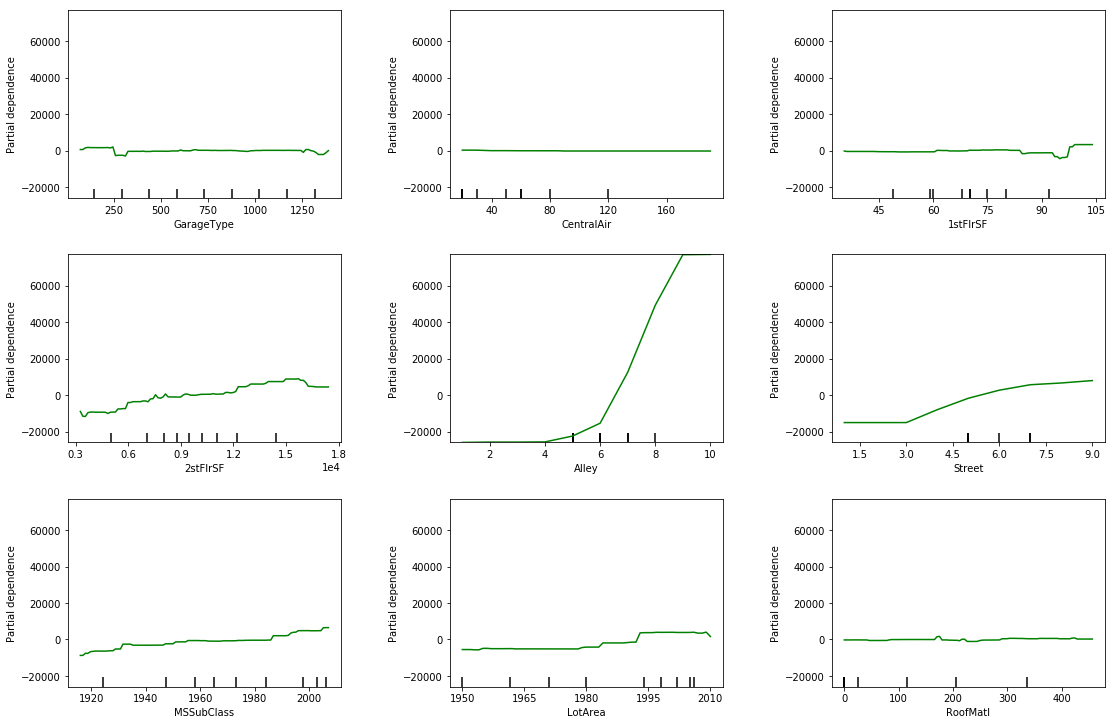

In [26]:
fig ,axs = plot_partial_dependence(gb_plus_model,
                                      features=[0,1,2,3,4,5,6,7,8],
                                      X=imputed_X_train_plus,
                                      feature_names=['GarageType','CentralAir','1stFlrSF','2stFlrSF','Alley','Street','MSSubClass','LotArea','RoofMatl'],
                                      grid_resolution=100)

plt.subplots_adjust(top=2.5,right=2.5)

**Decomposition with Principal Component Analysis and gradient boosting**

(0, 10)

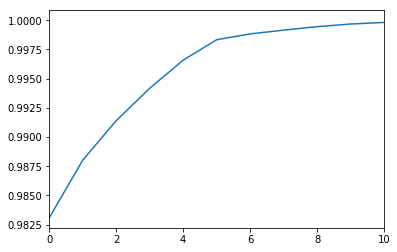

In [27]:
pca = PCA().fit(imputed_X_train_plus)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)


In [28]:
sklearn_pca = PCA(n_components=14)
print(sklearn_pca)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [29]:
X_sklearn = sklearn_pca.fit_transform(imputed_X_train_plus)
print(X_sklearn.shape)

X_test_sklearn=sklearn_pca.transform(imputed_X_test_plus)
print(X_test_sklearn.shape)

(1460, 14)
(1459, 14)


In [30]:
pca_gb_plus_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)
pca_gb_plus_model.fit(X_sklearn,y)
pca_gb_plus_pred_prices = pca_gb_plus_model.predict(X_test_sklearn)
print(pca_gb_plus_pred_prices)

[142347.93516634 149191.44823485 200000.57637453 ... 171833.88255287
  96228.62517137 216004.05105438]


In [31]:
my_submission = pd.DataFrame({'ID': test.Id, 'SalePrice': pca_gb_plus_pred_prices})

my_submission.to_csv('pca_gb_plus_submission.csv',index=False)

**Piplelines with Gradient boosting**

In [32]:
my_pipeline= make_pipeline(Imputer(),GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01))

print(cross_val_score(my_pipeline, imputed_X_train_plus, y, scoring = "neg_mean_absolute_error"))
my_pipeline.fit(imputed_X_train_plus,y)
pipe_line_predictions=my_pipeline.predict(imputed_X_test_plus)



[-15212.39975413 -16602.35795193 -16777.17069232]


In [33]:
my_submission = pd.DataFrame({'ID': test.Id, 'SalePrice': pipe_line_predictions})

my_submission.to_csv('pipe_line_predictions.csv',index=False)

**LightGBM**

In [34]:
lgb_dataSet=lgb.Dataset(imputed_X_train_plus, label=y)
params={
    'learning_rate':0.1,
    'boosting_type':'gbdt',
    'objective':'regression',
    'sub_features':0.5,
    'num_leaves':10000,
    'min_data':100,
    'max_depth':1000,
}

In [35]:
lgb_model=lgb.train(params,lgb_dataSet, num_boost_round=10000)
print(lgb_model.best_iteration)
lgb_pred_prices= lgb_model.predict(imputed_X_test_plus, num_iteration= 10000)


0


In [36]:
mean_absolute_error(gb_plus_pred_prices,lgb_pred_prices)

17276.94814559428

In [37]:
my_submission = pd.DataFrame({'ID': test.Id, 'SalePrice': lgb_pred_prices})

my_submission.to_csv('lgb_pred.csv',index=False)